In [1]:
import SNPLIB
import math
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

In [2]:
Fst = 0.1
num_generations = 200
effective_sample_size = math.floor(num_generations/2/(1-math.exp(-Fst)))

In [3]:
num_snps = 100000
num_samples = 4000
aaf = np.random.rand(num_snps)
pop_af = SNPLIB.UpdateAf(aaf,2,num_generations,effective_sample_size)

In [4]:
pop = np.zeros((num_samples,2),dtype='double',order='F')
pop[:,0] = np.sort(np.random.beta(0.1,0.1,num_samples))
pop[:,1] = 1.0-pop[:,0]

In [5]:
af = pop@pop_af
obj = SNPLIB.SNPLIB()

In [6]:
obj.GenerateIndividuals(af)
scores = obj.CalcSUGIBSScores(1)

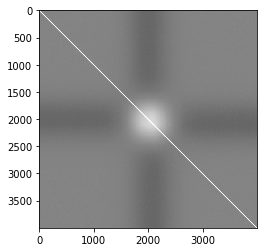

In [7]:
cov = np.ones((num_samples,2),dtype='double',order='F')
cov[:,1] = scores[:,0]
adjgrm_1,_ = obj.CalcAdjustedGRM(cov)
adjgrm_2,_ = obj.CalcAdmixedGRM(pop_af, pop)
plt.imshow(adjgrm_1,cmap='gray',vmin=-0.025,vmax=0.025)

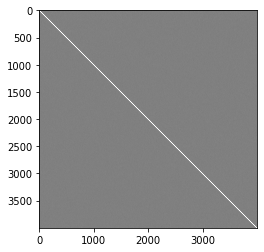

In [8]:
plt.imshow(adjgrm_2,cmap='gray',vmin=-0.025,vmax=0.025)

In [20]:
pop_af.shape

(2, 100000)